In [3]:
import cdsapi
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from datetime import datetime
from utils.data_processing import *
import os
import warnings; warnings.simplefilter('ignore')

In [2]:
#data_2016 = prepare_data2(min_wind = 30, min_steps= 20, max_steps=60, one_hot = False, secondary = False)

In [3]:
c = cdsapi.Client()

#Example of an API request
c.retrieve(
    'reanalysis-era5-pressure-levels',
    {
        'product_type': 'reanalysis',
        'variable': [
            'relative_humidity', 'temperature', 'u_component_of_wind',
            'v_component_of_wind', 'vorticity', 'geopotential'
        ],
        'pressure_level': [
            '700', '1000',
        ],
        'year': '1996',
        'month': '04',
        'day': ['06'],
        'area'          : [21.92801, 127.78100000000002, -2.12, 151.82100000000003], # North, West, South, East. Default: global
        'grid'          : [1.0, 1.0], # Latitude/longitude grid: east-west (longitude) and north-south resolution (latitude). Default: 0.25 x 0.25
        'time': [
            '18:00'
        ],
        'format': 'netcdf',
    },
    'test4.nc') #here specify filepath

2020-04-12 01:58:33,409 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2020-04-12 01:58:33,874 INFO Request is completed
2020-04-12 01:58:33,876 INFO Downloading http://136.156.133.39/cache-compute-0012/cache/data9/adaptor.mars.internal-1586467096.351193-21212-29-d91f2791-a4c4-4e34-b672-d20987b5c46e.nc to test4.nc (17.5K)
2020-04-12 01:58:34,205 INFO Download rate 53.5K/s


Result(content_length=17916,content_type=application/x-netcdf,location=http://136.156.133.39/cache-compute-0012/cache/data9/adaptor.mars.internal-1586467096.351193-21212-29-d91f2791-a4c4-4e34-b672-d20987b5c46e.nc)

In [4]:
#here example to process file from netcdf format to np.array
#nc_file = 'data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_2016_10_5_18_coord_25.1_-63.3.nc'
nc_file = 'data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_2018_11_2_6_coord_20.7_116.075.nc'#'test4.nc'
nc = netCDF4.Dataset(nc_file, mode='r')

nc.variables.keys()

lat = nc.variables['latitude'][:]
lat = np.array(lat)
lon = nc.variables['longitude'][:]
lon = np.array(lon)

time_var = nc.variables['time']
p = nc.variables['z']
dtime = netCDF4.num2date(time_var[:],time_var.units)
grid = nc.variables['u'][:]

grid = np.array(grid).squeeze(0)#reshape(grid.shape[1],grid.shape[2], grid.shape[3])

In [5]:
lat

array([32.692, 31.692, 30.692, 29.692, 28.692, 27.692, 26.692, 25.692,
       24.692, 23.692, 22.692, 21.692, 20.692, 19.692, 18.692, 17.692,
       16.692, 15.692, 14.692, 13.692, 12.692, 11.692, 10.692,  9.692,
        8.692], dtype=float32)

In [10]:
a = process_netcdf('data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_2018_11_2_6_coord_20.7_116.075.nc', 'u')

In [16]:
get_timestep_vision(datetime(2016, 1, 7, 6, 0), 3.4, -171.3)

array([[[[-7.03420532e+00, -6.91183698e+00, -6.74913492e+00, ...,
          -3.69334430e+00, -3.16422082e+00, -2.29396994e+00],
         [-8.17311968e+00, -7.89146739e+00, -8.05485307e+00, ...,
          -4.22725313e+00, -3.38981610e+00, -2.38967703e+00],
         [-9.04815592e+00, -9.67093562e+00, -1.02581670e+01, ...,
          -3.62019674e+00, -2.90854617e+00, -2.24133104e+00],
         ...,
         [ 1.71003880e+01,  1.66033948e+01,  1.54706330e+01, ...,
           1.00166962e+01,  5.05496725e+00,  1.14054731e+00],
         [ 1.40780949e+01,  1.44356292e+01,  1.39078730e+01, ...,
           5.94162506e+00,  1.45227897e+00,  1.65702248e-01],
         [ 1.26089910e+01,  1.26260816e+01,  1.34826600e+01, ...,
           1.37297881e+00,  9.87072859e-02, -9.74922464e-02]],

        [[-5.00111331e+00, -4.32022573e+00, -3.64959249e+00, ...,
          -1.55634173e+00, -3.68890206e-01,  1.19455345e+00],
         [-7.24476092e+00, -7.40404486e+00, -7.84361385e+00, ...,
           1.26052168e

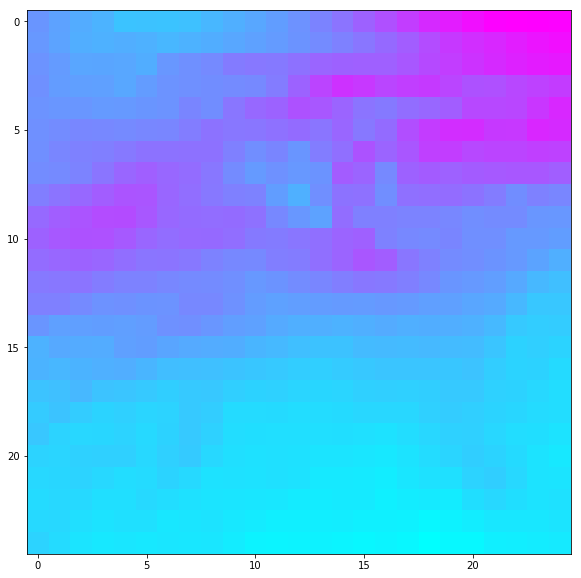

In [7]:
#Example of a plot, colors are artificial
plt.figure(figsize=(10,10))
plt.imshow(grid[1], cmap ='cool')
#plt.xticks(lon)
#plt.yticks(lat)
plt.show()

# Actual code to use

In [9]:
def process_netcdf(filepath, param):
    '''
    input: netcdf filepath and the specific corresponding parameter in str format (eg. 'z', 'u', 'v'...) 
    '''
    nc = netCDF4.Dataset(filepath, mode='r')
    nc.variables.keys()
    lat = nc.variables['latitude'][:]
    lon = nc.variables['longitude'][:]
    time_var = nc.variables['time']
    dtime = netCDF4.num2date(time_var[:],time_var.units)
    grid = nc.variables[param][:]
    #transform into np.array format and reshape something in (1,grid_size,grid_size) into (grid_size,grid_size)
    grid = np.array(grid).reshape(grid.shape[1],grid.shape[2], grid.shape[3])    
    return grid

In [9]:
#a = process_netcdf('data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_2016_10_5_18_coord_25.1_-63.3.nc', 'u')

In [10]:
def get_storms(extraction = False, min_wind = 30, min_steps= 20, max_steps=60, path = "ibtracs.since1980.list.v04r00.csv"):
    '''
    returns an array of elements of type [datetime, lat, lon]
    set extraction to True if used for downloading data and False if used to convert netcdf files to tensor
    '''
    data = prepare_data2(path = path, min_wind = min_wind, min_steps= min_steps, max_steps=max_steps, one_hot = False, secondary = False)
    e = data.transpose((2,0,1))
    d = e.reshape(e.shape[0]*e.shape[1],3)
    for t in d:
        try:
            t[0] = datetime.strptime(t[0], "%Y-%m-%d %H:%M:%S")
        except:
            pass
    if extraction :
        f = d.reshape(e.shape[0],e.shape[1],3)
        return f
    return d

In [12]:
def get_timestep_vision(time, lat, lon):
    '''
    given a datetime and latitute, longitude returns a processed array obtained after donwload
    '''
    filepath = get_filename(['700', '500', '225'], ['geopotential', 'u_component_of_wind', 'v_component_of_wind'], time, lat, lon)
    u, v, z = process_netcdf(filepath, 'u'), process_netcdf(filepath, 'v'), process_netcdf(filepath, 'z')
    return np.array([u, v, z])

In [12]:
bad_shapes = []
times, lati, long = [], [], []
def get_storm_vision(storm, epsilon = 0):
    '''
    given a storm (list of timesteps with time and lat/lon), returns the vision array
    epsilon is a parameter in case there is a scenario whith not correct grid size
    '''
    l = np.zeros((len(storm), 3, 3, 25, 25))
    
    for i in range(len(storm)):
        time, lat, lon = storm[i]
        try :
            l[i]=get_timestep_vision(time, lat, lon)
        except:
            try :
                b = get_timestep_vision(time, lat, lon)
                print(b.shape)
                print(time, lat, lon)
                get_data(['700', '500', '225'], ['geopotential', 'u_component_of_wind', 'v_component_of_wind'], time, lat, lon, grid_size = 25, force = True, epsilon = epsilon)
                times.append(time)
                lati.append(lat)
                long.append(lon)
                bad_shapes.append(b)
            except:
                pass
    return l

In [13]:
def extract_vision(data, epsilon):
    '''
    processes all the data to get the vision array
    '''
    
    vision = []
    for storm in data:
        vision.append(get_storm_vision(storm, epsilon))
    return np.array(vision)

In [15]:
def get_filename(pressure, params, time, lat, lon):
    '''
    returns filename to save the netcdf file
    '''
    params_str = '_'.join(map(str, params))
    pressure_str = '_'.join(map(str, pressure))
    year, month, day, hour = str(time.year), str(time.month), str(time.day), str(time.hour)
    return 'data_era/'+params_str+'/eradata_'+pressure_str+'hPa'+'_'+year+'_'+month+'_'+day+'_'+hour+'_'+'coord'+'_'+str(lat)+'_'+str(lon)+'.nc'

In [15]:
#get_data(['700', '500', '225'], ['geopotential', 'u_component_of_wind', 'v_component_of_wind'], times[0], lati[0], long[0], grid_size = 25)

In [16]:
def get_area(lat, lon, grid_size, e = 0.008):
    '''
    input : center of the storm, 
    output: returns a centered squared grid of size grid_size degrees
    '''
    val = grid_size // 2
    return [lat + val + e, lon - val, lat - val - e, lon + val]

In [17]:
def get_data(pressure_level, params, time, lat, lon, grid_size = 25, degbypix = 1.0, force = False, epsilon = 0.008):
    '''
    pressure_level is the the pressure level we wish to get the data.
    params has to be in format e.g: 'geopotential' or 'u_component_of_wind' or 'v_component_of_wind'
    grid_size should be odd
    '''
    if not os.path.exists(get_filename(pressure_level, params, time, lat, lon)) or force:
        c = cdsapi.Client()
        year, month, day, hour = str(time.year), str(time.month), str(time.day), str(time.hour)
    
        c.retrieve('reanalysis-era5-pressure-levels', {
            'variable'      : params,
            'pressure_level': pressure_level,
            'product_type'  : 'reanalysis',
            'year'          : year,
            'month'         : month,
            'day'           : day,
            'area'          : get_area(lat, lon, grid_size, epsilon), # North, West, South, East. Default: global
            'grid'          : [degbypix, degbypix], # Latitude/longitude grid: east-west (longitude) and north-south resolution (latitude). Default: 0.25 x 0.25
            'time'          : hour,
            'format'        : 'netcdf' # Supported format: grib and netcdf. Default: grib
        }, get_filename(pressure_level, params, time, lat, lon))
    else:
        print("Already downloaded", get_filename(pressure_level, params, time, lat, lon))

In [18]:
#Example
#get_data('700', 'u_component_of_wind', datetime.now(), 55.4467, 177.3241, 11)

In [19]:
def download_all(data):
    for storm in data:
        time, lat, lon = storm[0], storm[1], storm[2]
        get_data(['700', '500', '225'], 'geopotential', time, lat, lon, grid_size = 25)
        get_data(['700', '500', '225'], 'u_component_of_wind', time, lat, lon, grid_size = 25)
        get_data(['700', '500', '225'], 'v_component_of_wind', time, lat, lon, grid_size = 25)
        #get_data('700', 'vorticity', time, lat, lon, grid_size = 11, degbypix=1.0)
        #get_data('1000', 'relative_humidity', time, lat, lon, grid_size = 11, degbypix=1.0)
    print("Download complete.")

In [20]:
def download_all2(data):
    i = 0
    for storm in data:
        for t in storm:
            time, lat, lon = t[0], t[1], t[2]
            try:
                get_data(['700', '500', '225'], ['geopotential', 'u_component_of_wind', 'v_component_of_wind'], time, lat, lon, grid_size = 25)
            except:
                print("False request.")
        i+=1
        print("Storm ", i, " completed.")
    print("Download complete.")

In [ ]:
data = get_storms(extraction=True, min_wind = 50, min_steps= 30, max_steps=60)

The dictionary of storms has been created.
The trajectories have now been padded.
There are 1096 storms with 9 features, and maximum number of steps is 60 and minimum is 60.
The tensor has now been created.


In [ ]:
download_all2(data)

Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_1_6_0_coord_-15.0667_119.23299999999999.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_1_6_3_coord_-15.0481_119.01.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_1_6_6_coord_-15.0076_118.773.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_1_6_9_coord_-14.9683_118.57.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_1_6_12_coord_-14.9333_118.43299999999999.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_1_6_15_coord_-14.904_118.40299999999999.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_1_6_18_coord_

False request.
False request.
False request.
False request.
False request.
False request.
Storm  4  completed.
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_2_22_21_coord_-20.3901_152.06.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_2_23_0_coord_-20.7_151.857.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_2_23_3_coord_-21.0175_151.624.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_2_23_6_coord_-21.2886_151.41.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_2_23_9_coord_-21.4614_151.24.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_2_23_12_coord_-21.6143_151.143.nc
Already downloaded data_era/geopotential_

Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_8_3_9_coord_16.5688_-115.569.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_8_3_12_coord_16.9_-115.9.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_8_3_15_coord_17.1636_-116.17200000000001.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_8_3_18_coord_17.4115_-116.37799999999999.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_8_3_21_coord_17.6985_-116.514.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_8_4_0_coord_18.0_-116.6.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_8_4_3_coord_18.2969_-116.6510

Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_10_3_21_coord_38.5373_159.379.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_10_4_0_coord_39.35_160.63299999999998.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_10_4_3_coord_39.9992_160.47299999999998.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_10_4_6_coord_41.0_162.0.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_10_4_9_coord_41.9202_163.441.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_10_4_12_coord_43.0_165.0.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_10_4_15_coord_44.5004_166.916.nc


Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_12_30_9_coord_-23.1625_107.95299999999999.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_12_30_12_coord_-22.8_108.2.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_12_30_15_coord_-22.2106_108.234.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_12_30_18_coord_-21.5667_108.3.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_12_30_21_coord_-21.0413_108.619.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1980_12_31_0_coord_-20.6_109.1.nc
False request.
Storm  31  completed.
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hP

Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1981_9_9_6_coord_40.9_-49.1.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1981_9_9_9_coord_40.885_-48.4925.nc
Storm  42  completed.
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1981_9_5_6_coord_20.1_-65.5.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1981_9_5_9_coord_20.4848_-65.8428.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1981_9_5_12_coord_20.9_-66.2.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1981_9_5_15_coord_21.2927_-66.6575.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1981_9_5_18_coord_21.7_-67.1.nc
Already downl

Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1981_11_23_15_coord_13.5152_125.413.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1981_11_23_18_coord_13.9246_124.682.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1981_11_23_21_coord_14.2466_124.03.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1981_11_24_0_coord_14.56_123.4.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1981_11_24_3_coord_14.901_122.69200000000001.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1981_11_24_6_coord_15.2857_121.969.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1981_11_24_9_coord_15.7325_121.24.nc

2020-04-12 01:59:47,536 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2020-04-12 01:59:48,215 INFO Request is completed
2020-04-12 01:59:48,217 INFO Downloading http://136.156.133.41/cache-compute-0013/cache/data7/adaptor.mars.internal-1586567586.6344173-6080-27-947d2a28-1976-4603-b918-a8d167091122.nc to data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1982_4_28_18_coord_-10.8_77.2.nc (13K)
2020-04-12 01:59:48,532 INFO Download rate 41.4K/s


 data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1982_4_3_15_coord_-11.4073_157.688.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1982_4_3_18_coord_-11.668_157.553.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1982_4_3_21_coord_-11.9511_157.428.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1982_4_4_0_coord_-12.2935_157.3.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1982_4_4_3_coord_-12.7074_157.16299999999998.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1982_4_4_6_coord_-13.1745_157.02.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1982_4_4_9_coord_-13.6567_156.863.nc
Already downloaded da

Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1982_8_8_3_coord_21.5846_123.34899999999999.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1982_8_8_6_coord_21.825_123.333.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1982_8_8_9_coord_22.0719_123.337.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1982_8_8_12_coord_22.34_123.38.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1982_8_8_15_coord_22.6065_123.48100000000001.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1982_8_8_18_coord_22.9325_123.604.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1982_8_8_21_coord_23.3733_123.723.n

Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1982_9_25_12_coord_30.0_-122.0.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1982_9_25_15_coord_30.4689_-121.728.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1982_9_25_18_coord_31.0_-121.4.nc
False request.
False request.
False request.
False request.
False request.
False request.
False request.
False request.
False request.
False request.
False request.
Storm  85  completed.
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1982_10_2_15_coord_12.6036_145.977.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1982_10_2_18_coord_12.6684_145.502.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1982_1

Storm  98  completed.
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1983_4_23_0_coord_-9.9_81.4.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1983_4_23_3_coord_-9.65893_81.4531.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1983_4_23_6_coord_-9.435039999999999_81.5232.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1983_4_23_9_coord_-9.23676_81.6041.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1983_4_23_12_coord_-9.1_81.7.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1983_4_23_15_coord_-9.0356_81.8021.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1983_4_23_18_coord_-9.051

Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1983_10_15_3_coord_17.8168_-143.925.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1983_10_15_6_coord_18.0638_-144.299.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1983_10_15_9_coord_18.2716_-144.69799999999998.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1983_10_15_12_coord_18.48_-145.08.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1983_10_15_15_coord_18.7166_-145.457.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1983_10_15_18_coord_18.953_-145.795.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1983_10_15_21_coord_19.1653_

Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1984_6_29_15_coord_14.4501_-124.45.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1984_6_29_18_coord_14.6018_-125.00200000000001.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1984_6_29_21_coord_14.7581_-125.553.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1984_6_30_0_coord_14.9_-126.1.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1984_6_30_3_coord_15.0071_-126.65799999999999.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1984_6_30_6_coord_15.1_-127.18799999999999.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1984_6_30_9_coord

Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1984_9_18_0_coord_18.3_-112.0.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1984_9_18_3_coord_18.4567_-112.221.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1984_9_18_6_coord_18.6019_-112.47399999999999.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1984_9_18_9_coord_18.7574_-112.686.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1984_9_18_12_coord_18.9_-112.9.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1984_9_18_15_coord_19.0111_-113.141.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1984_9_18_18_coord_19.1199_-113.393999999

Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1985_2_14_12_coord_-13.35_101.4.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1985_2_14_15_coord_-13.2234_101.50299999999999.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1985_2_14_18_coord_-13.0506_101.603.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1985_2_14_21_coord_-12.9049_101.8.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1985_2_15_0_coord_-12.8_102.05.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1985_2_15_3_coord_-12.7535_102.32.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1985_2_15_6_coord_-12.7519_102.617.nc
Al

Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1985_7_26_12_coord_15.24_-155.32.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1985_7_26_15_coord_15.0564_-156.037.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1985_7_26_18_coord_14.8316_-156.836.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1985_7_26_21_coord_14.5598_-157.664.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1985_7_27_0_coord_14.26_-158.5.nc
False request.
False request.
False request.
False request.
False request.
False request.
False request.
False request.
False request.
False request.
False request.
False request.
False request.
False request.
False request.
False request.
False request.
Storm  162  completed.
Already downloa

Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1985_9_27_15_coord_40.0029_-73.5942.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1985_9_27_16_coord_40.6_-73.3.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1985_9_27_18_coord_41.9_-72.8.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1985_9_27_21_coord_43.8024_-71.5207.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1985_9_28_0_coord_45.5_-70.0.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1985_9_28_3_coord_46.9592_-68.9257.nc
Storm  175  completed.
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1985_9_30_21_coord_16.231_129.996.n

Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_3_6_0_coord_-18.6_114.5.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_3_6_3_coord_-18.7831_114.344.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_3_6_6_coord_-18.9886_114.195.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_3_6_9_coord_-19.2135_113.99600000000001.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_3_6_12_coord_-19.45_113.8.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_3_6_15_coord_-19.6612_113.553.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_3_6_16_coord_-19.738_113.461.nc
Already d

2020-04-12 01:59:52,629 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_10_6_0_coord_20.36_138.02.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_10_6_3_coord_20.7706_137.889.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_10_6_6_coord_21.2465_137.798.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_10_6_9_coord_21.7985_137.714.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_10_6_12_coord_22.38_137.7.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_10_6_15_coord_22.9048_137.765.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_10_6_18_coord_23.4368_137.934.nc
Already downloaded data_era/geopoten

2020-04-12 01:59:53,198 INFO Request is completed
2020-04-12 01:59:53,200 INFO Downloading http://136.156.132.110/cache-compute-0001/cache/data2/adaptor.mars.internal-1586670945.6472442-12174-31-8491f9c8-d490-4c0e-bb9f-12c49a1ca59c.nc to data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_11_24_12_coord_24.5895_127.353.nc (13K)
2020-04-12 01:59:53,488 INFO Download rate 45.4K/s
2020-04-12 01:59:53,611 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_11_24_15_coord_24.6087_127.58.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_11_24_18_coord_24.5582_127.758.nc


2020-04-12 01:59:54,228 INFO Request is completed
2020-04-12 01:59:54,230 INFO Downloading http://136.156.133.46/cache-compute-0015/cache/data3/adaptor.mars.internal-1586670961.2686822-19210-27-401b3bd2-3457-491c-838c-7d493ed08d9e.nc to data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_11_24_21_coord_24.4342_127.962.nc (13K)
2020-04-12 01:59:54,532 INFO Download rate 43.2K/s
2020-04-12 01:59:54,696 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2020-04-12 01:59:55,301 INFO Request is queued
2020-04-12 01:59:56,410 INFO Request is running
2020-04-12 02:00:00,366 INFO Request is completed
2020-04-12 02:00:00,368 INFO Downloading http://136.156.132.110/cache-compute-0001/cache/data5/adaptor.mars.internal-1586671196.6706011-13329-35-6d7ae581-457e-41c4-ae3f-c1fd651b926c.nc to data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_11_25_0_coord_24.1143_128.05

False request.
False request.
False request.
False request.
False request.
False request.
False request.
False request.
False request.
False request.
False request.
Storm  205  completed.


2020-04-12 02:00:29,413 INFO Request is queued
2020-04-12 02:00:30,516 INFO Request is running
2020-04-12 02:00:34,467 INFO Request is completed
2020-04-12 02:00:34,469 INFO Downloading http://136.156.133.36/cache-compute-0010/cache/data9/adaptor.mars.internal-1586671229.2224581-27315-15-11550dc0-c3f5-403b-bd3a-c16fb2676d24.nc to data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_11_29_0_coord_9.1_159.4.nc (13K)
2020-04-12 02:00:34,754 INFO Download rate 45.8K/s
2020-04-12 02:00:35,559 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2020-04-12 02:00:36,786 INFO Request is queued
2020-04-12 02:00:37,889 INFO Request is running
2020-04-12 02:00:41,850 INFO Request is completed
2020-04-12 02:00:41,852 INFO Downloading http://136.156.132.236/cache-compute-0007/cache/data2/adaptor.mars.internal-1586671237.7779586-23122-37-681b6c33-8f56-42c7-ba79-e42af705ef81.nc to data_era/geopotential_u_compon

Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_11_29_12_coord_9.4_157.5.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_11_29_15_coord_9.52645_157.05.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_11_29_18_coord_9.695219999999999_156.612.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_11_29_21_coord_9.89675_156.167.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_11_30_0_coord_10.14_155.74.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_11_30_3_coord_10.4094_155.357.nc
Already downloaded data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_11_30_6_coord_10.7148_154.995.nc
Al

2020-04-12 02:00:57,675 INFO Request is queued
2020-04-12 02:00:58,781 INFO Request is running
2020-04-12 02:01:02,739 INFO Request is completed
2020-04-12 02:01:02,741 INFO Downloading http://136.156.132.235/cache-compute-0006/cache/data9/adaptor.mars.internal-1586671257.8140128-10462-1-ef6abbd1-80d4-4a93-8ef2-4822fd74f986.nc to data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_12_16_15_coord_9.93795_147.757.nc (13K)
2020-04-12 02:01:03,019 INFO Download rate 46.9K/s
2020-04-12 02:01:03,294 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2020-04-12 02:01:03,879 INFO Request is queued
2020-04-12 02:01:04,984 INFO Request is running
2020-04-12 02:01:08,940 INFO Request is completed
2020-04-12 02:01:08,942 INFO Downloading http://136.156.132.210/cache-compute-0005/cache/data0/adaptor.mars.internal-1586671264.637768-480-7-51342c72-6997-4919-a376-bf266093e65c.nc to data_era/geopotential_u_com

False request.


2020-04-12 02:01:46,154 INFO Request is queued
2020-04-12 02:01:47,254 INFO Request is running
2020-04-12 02:01:51,205 INFO Request is completed
2020-04-12 02:01:51,207 INFO Downloading http://136.156.133.25/cache-compute-0008/cache/data1/adaptor.mars.internal-1586671306.1736152-323-5-251eda0d-2620-4acb-9e12-b8e8129b5dcf.nc to data_era/geopotential_u_component_of_wind_v_component_of_wind/eradata_700_500_225hPa_1986_12_17_12_coord_10.64_144.56.nc (13K)
2020-04-12 02:01:51,493 INFO Download rate 45.7K/s
2020-04-12 02:01:51,694 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2020-04-12 02:01:52,507 INFO Request is queued
2020-04-12 02:01:53,610 INFO Request is running
2020-04-12 02:01:57,563 INFO Request is completed
2020-04-12 02:01:57,566 INFO Downloading http://136.156.132.201/cache-compute-0004/cache/data6/adaptor.mars.internal-1586671313.1204956-28374-27-5eccf1b9-16b4-40cd-aa5a-e8c453169279.nc to data_era/geopotential_u_compo

# OBSERVE DATA

In [ ]:
vision_data = extract_vision(get_storms(extraction=True, min_wind = 30, min_steps= 20, max_steps=60), epsilon = 0.052)

In [ ]:
get_area(9.90801, 139.80100000000002, 25, 0.03)

In [ ]:
print(vision_data.shape)
vision_data[0][7,0,0,:,:]

In [ ]:
a = vision_data[1, 9, 0, 1]
plt.imshow(a)
plt.show()

# CNN

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math


# CNN for one stream : z (pressure field) : 2d data

class Net_2d_conv3_4fc(nn.Module):
    def __init__(self, dropout = 0.5):
        super(Net_2d_conv3_4fc, self).__init__()
        self.in_channels = 3 * 3
        #self.adjust_dim = False
       # if len(levellist) > 1 and len(params) >1:
            #self.adjust_dim = True

        self.conv1 = nn.Conv2d(in_channels=self.in_channels, out_channels=64, kernel_size=3, stride=1, padding=0, groups=1, bias=True)
        self.conv1_bn = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=0, groups=1, bias=True)
        self.conv2_bn = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=256, kernel_size=3, stride=1, padding=0, groups=1, bias=True)
        self.conv3_bn = nn.BatchNorm2d(256)

        self.fc1 = nn.Linear(in_features=256*4*4, out_features=576)
        self.fc1_bn = nn.BatchNorm1d(576)
        self.fc2 = nn.Linear(in_features=576, out_features=128)
        self.fc2_bn = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(in_features=128, out_features=64)
        self.fc3_bn = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(in_features=64, out_features=2)
        self.init_weights()

    def init_weights(self):
        for idx, m in enumerate(self.modules()):
            if isinstance(m, nn.Conv2d) and idx==1:
                nn.init.xavier_normal_(m.weight, gain=1)
                nn.init.normal_(m.bias,mean=0, std=1)
            if isinstance(m, nn.Conv2d) and idx!=1:
                nn.init.xavier_normal_(m.weight, gain=math.sqrt(2))
                nn.init.normal_(m.bias,mean=0, std=1)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm1d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear) and idx==1:
                nn.init.xavier_normal_(m.weight, gain=1)
                nn.init.normal_(m.bias,mean=0, std=1)
            elif isinstance(m, nn.Linear) and idx!=1:
                nn.init.xavier_normal_(m.weight, gain=math.sqrt(2))
                nn.init.normal_(m.bias,mean=0, std=1)

    def forward(self, x):
        x = F.relu(self.conv1_bn(self.conv1(x)))
        x = F.relu(self.conv2_bn(self.conv2(x)))
        x = F.max_pool2d(x, kernel_size=2, stride=2, padding=0)
        x = F.relu(self.conv3_bn(self.conv3(x)))
        x = F.max_pool2d(x, kernel_size=2, stride=2, padding=0)
        x = x.view(1, -1)
        x = F.relu(self.fc1_bn(self.fc1(x)))
        x = F.relu(self.fc2_bn(self.fc2(x)))
        x = F.relu(self.fc3_bn(self.fc3(x)))
        x = self.fc4(x)
        return x
    
class EncoderCNN(nn.Module):
    def __init__(self, dropout = 0.5):
        super(EncoderCNN, self).__init__()
        self.in_channels = 3 * 3
        #self.adjust_dim = False
       # if len(levellist) > 1 and len(params) >1:
            #self.adjust_dim = True

        self.conv1 = nn.Conv2d(in_channels=self.in_channels, out_channels=64, kernel_size=3, stride=1, padding=0, groups=1, bias=True)
        self.conv1_bn = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=0, groups=1, bias=True)
        self.conv2_bn = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=256, kernel_size=3, stride=1, padding=0, groups=1, bias=True)
        self.conv3_bn = nn.BatchNorm2d(256)
        self.init_weights()


    def init_weights(self):
        for idx, m in enumerate(self.modules()):
            if isinstance(m, nn.Conv2d) and idx==1:
                nn.init.xavier_normal_(m.weight, gain=1)
                nn.init.normal_(m.bias,mean=0, std=1)
            if isinstance(m, nn.Conv2d) and idx!=1:
                nn.init.xavier_normal_(m.weight, gain=math.sqrt(2))
                nn.init.normal_(m.bias,mean=0, std=1)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = F.relu(self.conv1_bn(self.conv1(x)))
        x = F.relu(self.conv2_bn(self.conv2(x)))
        x = F.max_pool2d(x, kernel_size=2, stride=2, padding=0)
        x = F.relu(self.conv3_bn(self.conv3(x)))
        x = F.max_pool2d(x, kernel_size=2, stride=2, padding=0)
        x = x.view(1, -1)
    
        return x
    
class EncoderLinear1(nn.Module):
    def __init__(self, rnn_decoder, dropout = 0.5):
        super(EncoderLinear1, self).__init__()

        self.fc1 = nn.Linear(in_features=256*4*4, out_features=576)
        self.fc1_bn = nn.BatchNorm1d(576)
        self.fc2 = nn.Linear(in_features=576, out_features=128)
        self.fc2_bn = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(in_features=128, out_features=64)
        self.fc3_bn = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(in_features=64, out_features=2)
        self.init_weights()
        self.rnn_decoder = rnn_decoder

    def init_weights(self):
        for idx, m in enumerate(self.modules()):
            if isinstance(m, nn.BatchNorm1d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear) and idx==1:
                nn.init.xavier_normal_(m.weight, gain=1)
                nn.init.normal_(m.bias,mean=0, std=1)
            elif isinstance(m, nn.Linear) and idx!=1:
                nn.init.xavier_normal_(m.weight, gain=math.sqrt(2))
                nn.init.normal_(m.bias,mean=0, std=1)

    def forward(self, x):
        x = F.relu(self.fc1_bn(self.fc1(x)))
        x = F.relu(self.fc2_bn(self.fc2(x)))
        if self.rnn_decoder:
            return x
        x = F.relu(self.fc3_bn(self.fc3(x)))
        x = self.fc4(x)
        return x
    
class EncoderCNNLinear1(nn.Module):
    def __init__(self, dropout = 0.5, rnn_decoder = False):
        super(EncoderCNNLinear1, self).__init__()

        self.cnn = EncoderCNN()
        self.linear = EncoderLinear1(rnn_decoder)

    def forward(self, x):
        x = self.cnn(x)
        x = self.linear(x)
        return x

In [ ]:
class DecoderGRU(nn.Module):
    def __init__(self, input_size, hidden_size, dropout = 0.5):
        super(DecoderGRU, self).__init__()
        self.in_channels = 3 * 3
        #self.adjust_dim = False
       # if len(levellist) > 1 and len(params) >1:
            #self.adjust_dim = True
        self.hidden_size = hidden_size
        self.rnn = nn.GRU(input_size=input_size, hidden_size=hidden_size)

    def forward(self, inputs, hidden = None):
        if hidden is None:
            hidden = self.init_hidden(self.hidden_size)
        outputs, hiddens = self.rnn(inputs.unsqueeze(0), hidden)
        return outputs, hiddens

    def init_hidden(self, hidden_size):
        return torch.zeros((1, 1, hidden_size))
    
class EncoderDecoder(nn.Module):
    def __init__(self, input_size, hidden_size, rnn_decoder = True, dropout = 0.5):
        super(EncoderDecoder, self).__init__()
        self.in_channels = 3 * 3
        #self.adjust_dim = False
       # if len(levellist) > 1 and len(params) >1:
            #self.adjust_dim = True
        self.hidden_size = hidden_size
        self.encoder = EncoderCNNLinear1(rnn_decoder=True)
        self.decoder = DecoderGRU(input_size, hidden_size)
        self.lastlinear = nn.Linear(hidden_size, 2)
        self.hidden = self.init_hidden(hidden_size)

    def forward(self, inputs, hidden = None):
        x = self.encoder(inputs)
        o, self.hidden = self.decoder(x, self.hidden)
        y = self.lastlinear(o)
        return y

    def init_hidden(self, hidden_size):
        return torch.zeros((1, 1, hidden_size))

In [ ]:
test = torch.Tensor(vision_data[0][0]).reshape(1, 9, 25, 25)

In [ ]:
e_d = EncoderDecoder(128, 128)
e_d.eval()
e_d(test)

In [ ]:
class ConvLSTMCell(nn.Module):

    def __init__(self, input_dim, hidden_dim, kernel_size, bias):
        """
        Initialize ConvLSTM cell.

        Parameters
        ----------
        input_dim: int
            Number of channels of input tensor.
        hidden_dim: int
            Number of channels of hidden state.
        kernel_size: (int, int)
            Size of the convolutional kernel.
        bias: bool
            Whether or not to add the bias.
        """

        super(ConvLSTMCell, self).__init__()

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        self.kernel_size = kernel_size
        self.padding = kernel_size[0] // 2, kernel_size[1] // 2
        self.bias = bias

        self.conv = nn.Conv2d(in_channels=self.input_dim + self.hidden_dim,
                              out_channels=4 * self.hidden_dim,
                              kernel_size=self.kernel_size,
                              padding=self.padding,
                              bias=self.bias)

    def forward(self, input_tensor, cur_state):
        h_cur, c_cur = cur_state

        combined = torch.cat([input_tensor, h_cur], dim=1)  # concatenate along channel axis

        combined_conv = self.conv(combined)
        cc_i, cc_f, cc_o, cc_g = torch.split(combined_conv, self.hidden_dim, dim=1)
        i = torch.sigmoid(cc_i)
        f = torch.sigmoid(cc_f)
        o = torch.sigmoid(cc_o)
        g = torch.tanh(cc_g)

        c_next = f * c_cur + i * g
        h_next = o * torch.tanh(c_next)

        return h_next, c_next

    def init_hidden(self, batch_size, image_size):
        height, width = image_size
        return (torch.zeros(batch_size, self.hidden_dim, height, width, device=self.conv.weight.device),
                torch.zeros(batch_size, self.hidden_dim, height, width, device=self.conv.weight.device))

In [ ]:
class ConvLSTM(nn.Module):

    """

    Parameters:
        input_dim: Number of channels in input
        hidden_dim: Number of hidden channels
        kernel_size: Size of kernel in convolutions
        num_layers: Number of LSTM layers stacked on each other
        batch_first: Whether or not dimension 0 is the batch or not
        bias: Bias or no bias in Convolution
        return_all_layers: Return the list of computations for all layers
        Note: Will do same padding.

    Input:
        A tensor of size B, T, C, H, W or T, B, C, H, W
    Output:
        A tuple of two lists of length num_layers (or length 1 if return_all_layers is False).
            0 - layer_output_list is the list of lists of length T of each output
            1 - last_state_list is the list of last states
                    each element of the list is a tuple (h, c) for hidden state and memory
    Example:
        >> x = torch.rand((32, 10, 64, 128, 128))
        >> convlstm = ConvLSTM(64, 16, 3, 1, True, True, False)
        >> _, last_states = convlstm(x)
        >> h = last_states[0][0]  # 0 for layer index, 0 for h index
    """

    def __init__(self, input_dim, hidden_dim, kernel_size, num_layers,
                 batch_first=False, bias=True, return_all_layers=False):
        super(ConvLSTM, self).__init__()

        self._check_kernel_size_consistency(kernel_size)

        # Make sure that both `kernel_size` and `hidden_dim` are lists having len == num_layers
        kernel_size = self._extend_for_multilayer(kernel_size, num_layers)
        hidden_dim = self._extend_for_multilayer(hidden_dim, num_layers)
        if not len(kernel_size) == len(hidden_dim) == num_layers:
            raise ValueError('Inconsistent list length.')

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.kernel_size = kernel_size
        self.num_layers = num_layers
        self.batch_first = batch_first
        self.bias = bias
        self.return_all_layers = return_all_layers

        cell_list = []
        for i in range(0, self.num_layers):
            cur_input_dim = self.input_dim if i == 0 else self.hidden_dim[i - 1]

            cell_list.append(ConvLSTMCell(input_dim=cur_input_dim,
                                          hidden_dim=self.hidden_dim[i],
                                          kernel_size=self.kernel_size[i],
                                          bias=self.bias))

        self.cell_list = nn.ModuleList(cell_list)

    def forward(self, input_tensor, hidden_state=None):
        """

        Parameters
        ----------
        input_tensor: todo
            5-D Tensor either of shape (t, b, c, h, w) or (b, t, c, h, w)
        hidden_state: todo
            None. todo implement stateful

        Returns
        -------
        last_state_list, layer_output
        """
        if not self.batch_first:
            # (t, b, c, h, w) -> (b, t, c, h, w)
            input_tensor = input_tensor.permute(1, 0, 2, 3, 4)

        b, _, _, h, w = input_tensor.size()

        # Implement stateful ConvLSTM
        if hidden_state is not None:
            raise NotImplementedError()
        else:
            # Since the init is done in forward. Can send image size here
            hidden_state = self._init_hidden(batch_size=b,
                                             image_size=(h, w))

        layer_output_list = []
        last_state_list = []

        seq_len = input_tensor.size(1)
        cur_layer_input = input_tensor

        for layer_idx in range(self.num_layers):

            h, c = hidden_state[layer_idx]
            output_inner = []
            for t in range(seq_len):
                h, c = self.cell_list[layer_idx](input_tensor=cur_layer_input[:, t, :, :, :],
                                                 cur_state=[h, c])
                output_inner.append(h)

            layer_output = torch.stack(output_inner, dim=1)
            cur_layer_input = layer_output

            layer_output_list.append(layer_output)
            last_state_list.append([h, c])

        if not self.return_all_layers:
            layer_output_list = layer_output_list[-1:]
            last_state_list = last_state_list[-1:]

        return layer_output_list, last_state_list

    def _init_hidden(self, batch_size, image_size):
        init_states = []
        for i in range(self.num_layers):
            init_states.append(self.cell_list[i].init_hidden(batch_size, image_size))
        return init_states

    @staticmethod
    def _check_kernel_size_consistency(kernel_size):
        if not (isinstance(kernel_size, tuple) or
                (isinstance(kernel_size, list) and all([isinstance(elem, tuple) for elem in kernel_size]))):
            raise ValueError('`kernel_size` must be tuple or list of tuples')

    @staticmethod
    def _extend_for_multilayer(param, num_layers):
        if not isinstance(param, list):
            param = [param] * num_layers
        return param

In [ ]:
c = ConvLSTM(input_dim = 9, hidden_dim=128, kernel_size=(3,3), num_layers=1, batch_first=True, bias = True)

In [ ]:
v = vision_data.reshape(18, 60, 9, 25, 25)
v = torch.Tensor(v)

In [ ]:
v[0].unsqueeze(0).shape

In [ ]:
c.eval()
outputs, last_states = c(v[0][:10].unsqueeze(0))

In [ ]:
outputs[0][0].shape

In [ ]:
len(a[0])